<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, define _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

Kaggle data dictionary not specific enough. What is 'support_services'? Support who? 
This glossary from NCES is better defined.
- https://nces.ed.gov/pubs2018/2018301/glossary.asp 

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [139]:
edu = pd.read_csv(r'/Users/jameskim/Desktop/Education/Undergrad/WN21/MDST/mdst_tutorials/data/states_edu.csv')
edu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


Chosen test: **4TH GRADE READING**

# THINKPAD

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~  THINKPAD  ~~~~~~~~~~~~~~~~~~~~~~
# Used this to check how many entries per year. All b/w 51-53.
# NOTE: NO DATA FOR 2018
#for year in range(1986, 2020):
#    print(year, len(edu[edu['year'] == year]))
    
# Confirming no missing states
#list(edu['state'].unique())

In [141]:
# Lower case columns
edu = edu.rename(mapper = str.lower, axis = 'columns')

# Create an index of numerical column index values for convenient slicing
column_index = {}
iterator = 0
for item in edu.columns:
    column_index.update({item: iterator})
    iterator += 1
column_index

{'primary_key': 0,
 'state': 1,
 'year': 2,
 'enroll': 3,
 'total_revenue': 4,
 'federal_revenue': 5,
 'state_revenue': 6,
 'local_revenue': 7,
 'total_expenditure': 8,
 'instruction_expenditure': 9,
 'support_services_expenditure': 10,
 'other_expenditure': 11,
 'capital_outlay_expenditure': 12,
 'grades_pk_g': 13,
 'grades_kg_g': 14,
 'grades_4_g': 15,
 'grades_8_g': 16,
 'grades_12_g': 17,
 'grades_1_8_g': 18,
 'grades_9_12_g': 19,
 'grades_all_g': 20,
 'avg_math_4_score': 21,
 'avg_math_8_score': 22,
 'avg_reading_4_score': 23,
 'avg_reading_8_score': 24}

In [74]:
# NAN STUFF
# ------------

# Check if any -- returns True
edu.isnull().to_numpy().any()

# Create a dict containing number of NaNs value for reference
problematic_cols = {}
for col in edu.columns:
    problematic_cols.update({col : edu[col].isnull().sum()})
problematic_cols
    # avg math and reading scores for 4th and 8th grade contain > 1000 NaNs -- This is what we're trying to predict


{'primary_key': 0,
 'state': 0,
 'year': 0,
 'enroll': 491,
 'total_revenue': 440,
 'federal_revenue': 440,
 'state_revenue': 440,
 'local_revenue': 440,
 'total_expenditure': 440,
 'instruction_expenditure': 440,
 'support_services_expenditure': 440,
 'other_expenditure': 491,
 'capital_outlay_expenditure': 440,
 'grades_pk_g': 173,
 'grades_kg_g': 83,
 'grades_4_g': 83,
 'grades_8_g': 83,
 'grades_12_g': 83,
 'grades_1_8_g': 695,
 'grades_9_12_g': 644,
 'grades_all_g': 83,
 'avg_math_4_score': 1150,
 'avg_math_8_score': 1113,
 'avg_reading_4_score': 1065,
 'avg_reading_8_score': 1153}

In [142]:
# DROP ROWS MISSING 4TH GRADE READING SCORES
edu.dropna(subset=['avg_reading_4_score'], inplace=True)

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [143]:
# CREATE A DICT OF FEATURE CALCULATIONS FOR REFERENCE
feature_dict = {
            'F1' : 'total_expenditure / grades_all_g',
            'F2' : 'instruction_expenditure / total_expenditure',
            'F3' : 'support_services_expenditure / total_expenditure'
            }


# CREATE FEATURE COLS
# FEATURE 1 -- total_expenditure / grades_all   (PER CAPITA EXPENDITURE)
edu['F1'] = edu['total_expenditure'] / edu['grades_all_g']

# FEATURE 2 -- instruction_expenditure / total_expenditure
edu['F2'] = edu['instruction_expenditure'] / edu['total_expenditure']

# FEATURE 3 -- support_services_expenditure / total_expenditure 
edu['F3'] = edu['support_services_expenditure'] / edu['total_expenditure']

# Final feature list:   
- F1 : total_expenditure / grades_all_g  
- F2 : instruction_expenditure / total_expenditure  
- F3 : support_services_expenditure / total_expenditure  

# Feature selection justification:  
- F1: This measures total expenditure per student, serving as a proxy for student access to resources.
- F2: A measure of spending on instructors (salaries, benefits) and proxy for value placed on teachers by the State.
- F3: Another measure of the extent of States' investment in educational infrastructure.

<h2> EDA </h2>

### Visualization 1

<AxesSubplot:xlabel='F1', ylabel='Count'>

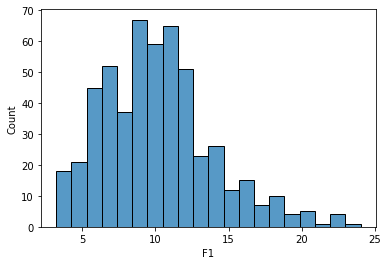

In [144]:
# PUBLIC SCHOOLS EXPENDITURE PER CAPITA
sns.histplot(data = edu, x = 'F1', bins = 20)

**Distribution of per capita spending appears to be bimodal and right-skewed.**

### Visualization 2

Text(0.5, 1.0, '4th grade reading score over time')

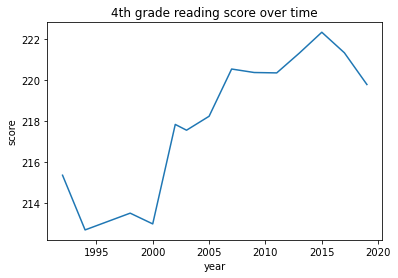

In [145]:
edu.groupby('year').avg_reading_4_score.mean().plot()
plt.ylabel('score')
plt.title('4th grade reading score over time')

**According to this data, appears that 4th grade reading level has gone up over time but in recent years has started to drop.**

## Visualization 3

<AxesSubplot:>

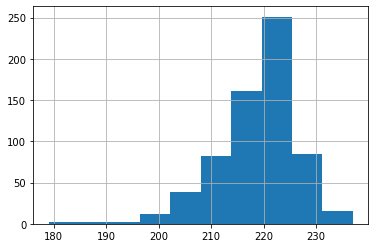

In [146]:
edu.avg_reading_4_score.hist()

**4th grade reading scores appear to be left skewed and unimodal.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X = edu[['F1','F2','F3']].dropna()
y = edu.loc[X.index]['avg_reading_4_score'] 

In [149]:
feature_dict

{'F1': 'total_expenditure / grades_all_g',
 'F2': 'instruction_expenditure / total_expenditure',
 'F3': 'support_services_expenditure / total_expenditure'}

In [150]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size = .3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **< REGRESSION >**

In [151]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [152]:
# create your model here
model = LinearRegression()

In [153]:
model.fit(X_train, y_train)

LinearRegression()

In [154]:
y_pred = model.predict(X_test)

202.73749328006562
[  0.84341615  43.31593544 -51.66084791]


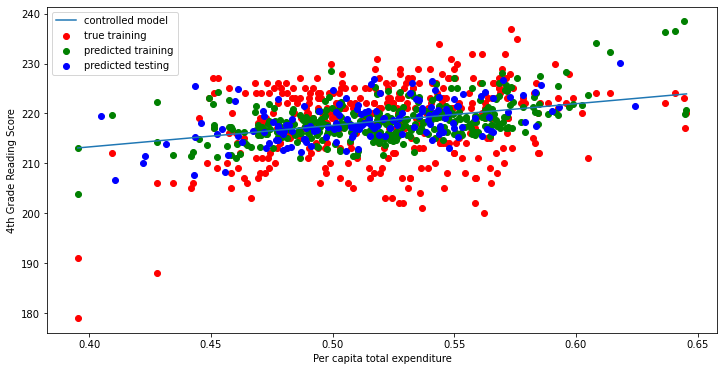

In [155]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'F2'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel('Per capita total expenditure')
plt.ylabel('4th Grade Reading Score')

print(model.intercept_)
print(model.coef_)

In [156]:
R_sq = model.score(X_test, y_test)
R_sq

0.4083357872305393

In [157]:
mean_error = np.mean(model.predict(X_test)-y_test)
mean_error

0.32118400169298683

In [158]:
mean_abs_error = np.mean(np.abs(model.predict(X_test)-y_test))
mean_abs_error

5.173283349116721

In [159]:
mean_sq_error = np.mean((model.predict(X_test)-y_test)**2)**0.5
mean_sq_error

6.952565487939853

<h2> Summary </h2>

In [160]:
print(model.coef_)

[  0.84341615  43.31593544 -51.66084791]


Our model predicts that a: 
- $1 increase in per capita expenditure, assuming all other variables (features) are held constant, is associated with an increase in 4th grade reading score by 0.84
- 1\% increase in instruction expenditure as a percentage of total expenditure is associated with an increase of reading score by 43.32
- 1\% increase in support structure expenditure as a percentage of total expenditure is associated with a *decrease* of reading score by 51.66.

It should be noted that the R-squared value for this regression is quite small, about 0.4, which is to be expected, as we have only looked at a few variables. 

The mean error in our model is about 0.32, but the mean squared error is about 6.95, meaning our data contains many outliers -- a reflection both of the fact that our selection of features was not comprehensive enough to explain all the data, and perhaps also a sign that a linear model may not be the best to use in this case. Since the features chosen were all metrics related to school expenditures, in the future we should include revenue data as well, but also data unrelated to finances, as doing so would increase our R-squared value in a non-trivial wa.